## Sobel hotizontal and vertical edge detectors

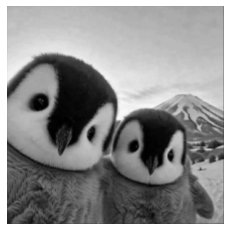

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


# load image
img = Image.open("penguin.jpg")
# convert to tensor 
convert_img = transforms.ToTensor()
img = convert_img(img)[0] 
# show image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Horizontal filter

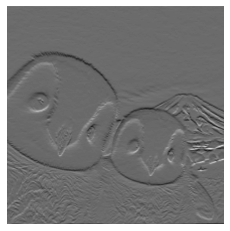

In [2]:
filters1 = torch.Tensor([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
# reshape img to fit the input shape for F.conv2d
img_conv1 = F.conv2d(img.unsqueeze(0).unsqueeze(0), filters1.unsqueeze(0).unsqueeze(0))[0,0]

plt.imshow(img_conv1, cmap='gray')
plt.axis('off')
plt.show()

Vertical filter

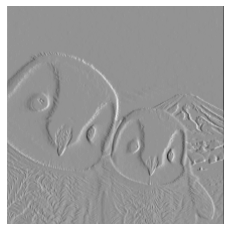

In [3]:
filters2 = torch.Tensor([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
img_conv2 = F.conv2d(img.unsqueeze(0).unsqueeze(0), filters2.unsqueeze(0).unsqueeze(0))[0,0]

plt.imshow(img_conv2, cmap='gray')
plt.axis('off')
plt.show()

## Convolution layer

In [4]:
import torch.nn as nn

# Define a Conv2d layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
# `in_channels` refers to the depth of the input (e.g., 3 for RGB images, 1 for grayscale images)
# `out_channels` is the number of filters/kernels
# `kernel_size` is the size of each filter
# `stride` controls the step size when moving the filter
# `padding` is added to the input to control the spatial size of the output

# Assuming we have a single-channel image (e.g., grayscale) with a size of 28x28 pixels
# Create a dummy input tensor with shape (batch_size, channels, height, width)
# Here, batch_size=1, channels=1, height=width=28
input_tensor = torch.randn(1, 1, 28, 28)

# Apply the conv_layer to the input_tensor
output_tensor = conv_layer(input_tensor)

# Print the shape of the output tensor
print("Output shape:", output_tensor.shape)
# Output shape will typically be (1, 32, 28, 28) if padding is set to 'same' or equivalent, keeping the height and width unchanged, and the channels equal to out_channels of the conv_layer

Output shape: torch.Size([1, 32, 28, 28])


## Pooling layer

Max pooling

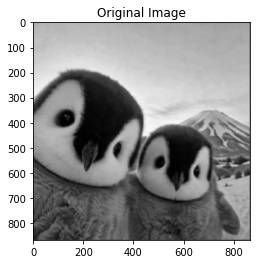

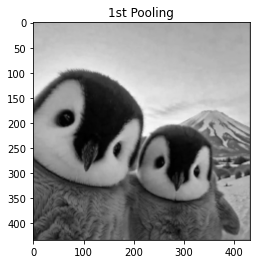

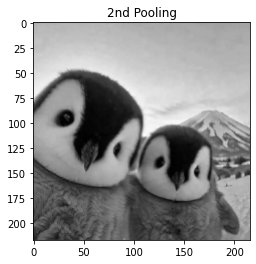

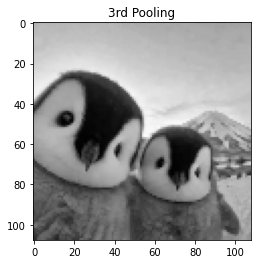

In [5]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image_path = 'penguin.jpg'  # Update this to your image path
image = Image.open(image_path)

# Transform the image to tensor
transform = transforms.ToTensor()
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Define max pooling operation
pool = torch.nn.MaxPool2d(kernel_size=2)

# Apply max pooling operations
pooled_image1 = pool(image_tensor)
pooled_image2 = pool(pooled_image1)
pooled_image3 = pool(pooled_image2)

# Function to plot images
def plot_image(tensor, title):
    plt.figure()
    tensor = tensor.squeeze(0)  # Remove batch dimension
    tensor = transforms.ToPILImage()(tensor)
    plt.imshow(tensor)
    plt.title(title)

# Plot original and pooled images
plot_image(image_tensor, 'Original Image')
plot_image(pooled_image1, '1st Pooling')
plot_image(pooled_image2, '2nd Pooling')
plot_image(pooled_image3, '3rd Pooling')

plt.show()

Average pooling

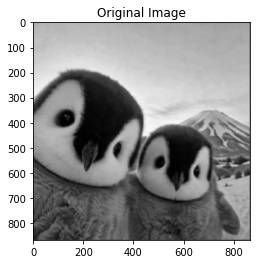

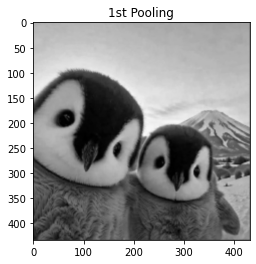

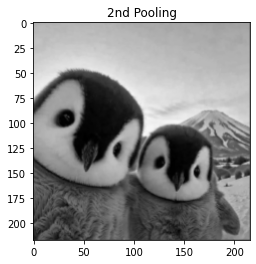

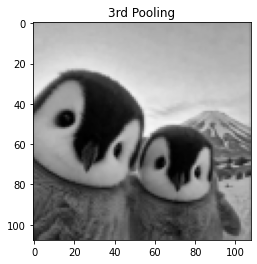

In [6]:
# Define average pooling operation
pool = torch.nn.AvgPool2d(kernel_size=2)

# Apply max pooling operations
pooled_image1 = pool(image_tensor)
pooled_image2 = pool(pooled_image1)
pooled_image3 = pool(pooled_image2)

# Function to plot images
def plot_image(tensor, title):
    plt.figure()
    tensor = tensor.squeeze(0)  # Remove batch dimension
    tensor = transforms.ToPILImage()(tensor)
    plt.imshow(tensor)
    plt.title(title)

# Plot original and pooled images
plot_image(image_tensor, 'Original Image')
plot_image(pooled_image1, '1st Pooling')
plot_image(pooled_image2, '2nd Pooling')
plot_image(pooled_image3, '3rd Pooling')

plt.show()

## Modern CNNs

In [7]:
import torchvision.models as models
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # Convolutional layer (sees 32x32x1 image tensor)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        # Convolutional layer (sees 14x14x6 image tensor)
        self.conv2 = nn.Conv2d(6, 16, 5, stride=1)
        # Average pooling layer with a 2x2 window
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        # Fully connected layer (sees 5x5x16 image tensor)
        self.fc1 = nn.Linear(16*5*5, 120)
        # Fully connected layer (sees 120-dimensional vector)
        self.fc2 = nn.Linear(120, 84)
        # Output layer (sees 84-dimensional vector)
        self.fc3 = nn.Linear(84, 10)  # 10 output classes for MNIST

    def forward(self, x):
        # Apply a ReLU activation function to convolutional layer
        x = F.relu(self.conv1(x))
        # Apply average pooling
        x = self.pool(x)
        # Apply a ReLU activation function to convolutional layer
        x = F.relu(self.conv2(x))
        # Apply average pooling
        x = self.pool(x)
        # Flatten image input
        x = x.view(-1, 16*5*5)
        # Fully connected layer with a ReLU activation function
        x = F.relu(self.fc1(x))
        # Fully connected layer with a ReLU activation function
        x = F.relu(self.fc2(x))
        # Final output layer
        x = self.fc3(x)
        return x


model = LeNet()
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
alexnet_model = models.alexnet()
alexnet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
vgg_model = models.vgg16()
vgg_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
googlenet_model = models.googlenet()
googlenet_model

/Users/zzachw/miniconda3/envs/pytorch19/lib/python3.8/site-packages/torchvision/models/googlenet.py:77: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn('The default weight initialization of GoogleNet will be changed in future releases of '


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [12]:
resnet_model = models.resnet50()
resnet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
densenet_model = models.densenet121()
densenet_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu